# Stability functions for two-equation turbulence closures

Two equation turbulence closures model the effects of turbulence be evolving two partial differential equations for 

1. Turbulent kinetic energy (TKE), $e$, 
2. A 'turbulence scale', which we denote $\lambda$.

The eddy diffusivities for a field $K_\Phi$ are defined interms of the $e$ and $\lambda$ with

$$ K_\Phi = \Upsilon^K_\Phi \, \tau \, e \, , $$

where $\tau$ is a turbulent time-scale formed by the the appropriate combination of $e$ and $\lambda$. 
For example, if $\lambda$ represents turbulent kinetic energy dissipation such that $\lambda = \epsilon$, then $\tau = e / \lambda$.
If $\lambda$ is a length-scale, then $\tau = \lambda / \sqrt{e}$.

The function $\Upsilon^K_\Phi$ is called the 'stability function'.
It is a Pade polynomial function of two non-dimensional numbers that resemble subfilter Froude numbers for buoyancy frequency and shear frequency:

$$ \mathbb{F}_N \equiv \left ( \tau N \right )^2 \, , \qquad \text{and} \qquad \mathbb{F}_M \equiv \left ( \tau M \right )^2 \, , $$

where 

$$ N^2 \equiv \partial_z B \, , \qquad \text{and} \qquad M^2 \equiv \left ( \partial_z U \right )^2 + \left ( \partial_z V \right )^2 \, , $$

are the squared buoyancy frequency and shear frequency, respectively.

The stability functions have the form

$$ \Upsilon^K_\Phi \left (\mathbb{F}_N, \mathbb{F}_M \right ) = \frac{
    C_\Phi^{K_0} + C_\Phi^{K_{0n}} \mathbb{F}_N + C_\Phi^{K_{0m}} \mathbb{F}_M}  
    {
        C_\Phi^{K_1} + C_\Phi^{K_{1n}} \mathbb{F}_N + C_\Phi^{K_{1m}} \mathbb{F}_M 
        + C_\Phi^{K_{2n}} \mathbb{F}_N^2 + C_\Phi^{K_{2m}} \mathbb{F}_M^2 + C_\Phi^{K_{nm}}
            \mathbb{F}_N \mathbb{F}_M} \, $$

In [110]:
using Pkg; Pkg.add("PyCall")
using Printf, PyPlot, PyCall

font_manager = pyimport("matplotlib.font_manager")
defaultcolors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

Base.@kwdef struct StabilityFunctionParameters{T}
    # Parameters for momentum stability function
     Cᴷ⁰U :: T = 0.1270
    Cᴷⁿ⁰U :: T = 0.01526
    Cᴷᵐ⁰U :: T = -0.00016
     Cᴷ¹U :: T = 1.0
    Cᴷⁿ¹U :: T = 0.1977
    Cᴷᵐ¹U :: T = 0.03154
    Cᴷⁿ²U :: T = 0.005832
    Cᴷᵐ²U :: T = -0.000042
    CᴷⁿᵐU :: T = 0.004127
    # Parameters for tracer stability function
     Cᴷ⁰T :: T = 0.1190
    Cᴷⁿ⁰T :: T = 0.00429
    Cᴷᵐ⁰T :: T = 0.00066
     Cᴷ¹T :: T = 1.0
    Cᴷⁿ¹T :: T = 0.01977
    Cᴷᵐ¹T :: T = 0.03154
    Cᴷⁿ²T :: T = 0.005832
    Cᴷᵐ²T :: T = -0.000042
    CᴷⁿᵐT :: T = 0.004127
end

function 𝚼ᴷT(p, 𝐅𝐫ᴺ, 𝐅𝐫ᴹ)
    ((p.Cᴷ⁰T + p.Cᴷⁿ⁰T*𝐅𝐫ᴺ + p.Cᴷᵐ⁰T*𝐅𝐫ᴹ)
        / (p.Cᴷ¹T + p.Cᴷⁿ¹T*𝐅𝐫ᴺ + p.Cᴷᵐ¹T*𝐅𝐫ᴹ + p.Cᴷⁿ²T*𝐅𝐫ᴺ^2 + p.Cᴷᵐ²T*𝐅𝐫ᴹ^2 + p.CᴷⁿᵐT*𝐅𝐫ᴺ*𝐅𝐫ᴹ) )
end

function 𝚼ᴷU(p, 𝐅𝐫ᴺ, 𝐅𝐫ᴹ)
    ((p.Cᴷ⁰U + p.Cᴷⁿ⁰U*𝐅𝐫ᴺ + p.Cᴷᵐ⁰U*𝐅𝐫ᴹ)
        / (p.Cᴷ¹U + p.Cᴷⁿ¹U*𝐅𝐫ᴺ + p.Cᴷᵐ¹U*𝐅𝐫ᴹ + p.Cᴷⁿ²U*𝐅𝐫ᴺ^2 + p.Cᴷᵐ²U*𝐅𝐫ᴹ^2 + p.CᴷⁿᵐU*𝐅𝐫ᴺ*𝐅𝐫ᴹ) )
end

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
  [438e738f] + PyCall v1.91.2
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


# Visualization

Next we visualize the stability functions in the Bz, Uz plane.

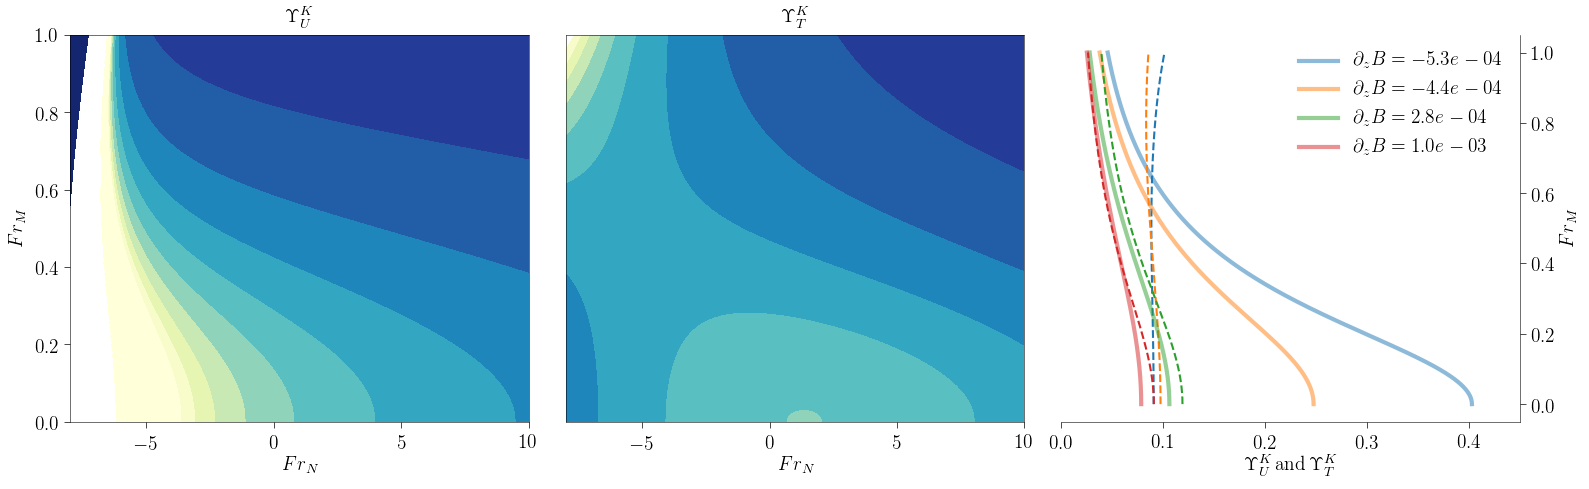

In [157]:
# Visualize
p = StabilityFunctionParameters()
n = 10^3
Bz⁻ = -8e-4
Bz⁺ = 1e-3
Uz⁺ = 1e-2

Bz = reshape(range(Bz⁻, stop=Bz⁺, length=n), 1, n) # Inf to 200π seconds buoyancy period
Uz = reshape(range(0, stop=Uz⁺, length=n), n, 1) # Shear of 0 to 0.1 s⁻¹

τ = 100 # seconds

𝐅𝐫ᴺ = τ^2 .* Bz
𝐅𝐫ᴹ = τ .* Uz

a𝐅𝐫ᴺ = zeros(n, n)
a𝐅𝐫ᴹ = zeros(n, n)
a𝚼ᴷU = zeros(n, n)
a𝚼ᴷT = zeros(n, n)
for i=1:n, j=1:n
    
    a𝚼ᴷU[i, j] = 𝚼ᴷU(p, 𝔽ᴺ[j], 𝔽ᴹ[i])
    a𝚼ᴷT[i, j] = 𝚼ᴷT(p, 𝔽ᴺ[j], 𝔽ᴹ[i])
    
    a𝐅𝐫ᴺ[i, j] = 𝐅𝐫ᴺ[j]
    a𝐅𝐫ᴹ[i, j] = 𝐅𝐫ᴹ[i]
end

using PyPlot

fig, axs = subplots(ncols=3, figsize=(16, 5))

sca(axs[1])
title(L"\Upsilon^K_U")
xlabel(L"Fr_N")
ylabel(L"Fr_M")
contourf(a𝐅𝐫ᴺ, a𝐅𝐫ᴹ, a𝚼ᴷU, levels=cat([0.02i for i=0:10], [10.0], dims=1), vmax=0.2)

sca(axs[2])
title(L"\Upsilon^K_T")
xlabel(L"Fr_N")
axs[2].tick_params(left=false, labelleft=false)
contourf(a𝐅𝐫ᴺ, a𝐅𝐫ᴹ, a𝚼ᴷT, levels=[0.02i for i=0:10])

sca(axs[3])
for (ip, j) = enumerate([150, 200, 600, 1000])
    labelstr = @sprintf("\$ \\partial_z B = %.1e \$", Bz[j])
    plot(a𝚼ᴷU[:, j], a𝐅𝐫ᴹ[:, j], linewidth=3, alpha=0.5, label=labelstr, color=defaultcolors[ip])
    plot(a𝚼ᴷT[:, j], a𝐅𝐫ᴹ[:, j], "--", color=defaultcolors[ip])
end

axs[3].spines["top"].set_visible(false)
axs[3].spines["left"].set_visible(false)
axs[3].tick_params(left=false, labelleft=false, right=true, labelright=true)
axs[3].yaxis.set_label_position("right")
xlabel(L"\Upsilon^K_U \, \mathrm{and} \, \Upsilon^K_T")
ylabel(L"Fr_M")
xlim(0.0, 0.45)
legend()

tight_layout()